<a href="https://colab.research.google.com/github/rahulkasaudhan99/Image_Captioning/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Captioning



## Steps
- Data Collection
- Understanding the data
- Data Cleaning
- Loading the Training Set
- Data Preprocessing : Images
- Data Precprocessing : Captions
- Data Preparation using Generator Function
- Word Embeddings
- Model Architecture
- Inference
- Evaluation

In [ ]:
from os import listdir

### Module 1 : 
- To load the Flickr8k.token into memory from dataset 

In [ ]:
# load doc into memory
def load_doc(file_name):
	file = open(file_name, 'r') # read only
	text = file.read()  # read all text
	file.close()
	return text
 
file_name = "/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_text/Flickr8k.token.txt"

# load doc
doc = load_doc(file_name)

### Module 2 : 
- File read from directory is in text format, which is converted to Python list using split function (Splitted across newline)

In [ ]:
#print(docs[-1]) last line empty so discard
#text file converted to Python list 
def txtToList(doc):
    captions=doc.split('\n')[:-1] #also last line discard
    return captions

docs=txtToList(doc)

#Print last imgid and caption
print(docs[-1])
print(len(docs))

997722733_0cb5439472.jpg#4	A rock climber practices on a rock climbing wall .
40460


### Module 3 : Extract descriptions for images
- Creating a Dictionary which stores key value pair where key is the image_id and values are 5 captions mapped to that image_id

In [ ]:
# extract descriptions for images
def extract_descriptions(docs):
	map = dict()
	for line in docs:
		if len(line) <= 1:
			continue
		# tokenize line
		tokens = line.split()
		# take the first token as the image id
		image_id  = tokens[0]
		# remove (.jpg#0 .jpg#1 .jp#2 .jpg#3 .jpg#4) from image_id
		image_id = image_id.split('.')[0]

		# take rest tkens as description
		image_desc = tokens[1:]
		# description tokens back to string or sentence
		image_desc = ' '.join(image_desc)
  
		if image_id not in map:
			map[image_id] = list()
		map[image_id].append(image_desc)
	return map
 
descriptions = extract_descriptions(docs)
print('Loaded %d descriptions Successfully.' % len(descriptions))

Loaded 8092 descriptions Successfully.


See the output for Extracted descriptions

In [ ]:
print(type(descriptions))

dict_items = descriptions.items()
#caption.items() : Returns a list containing a tuple for each key value pair
#first two img_id and their corresponding 5 captions
first_two = list(dict_items)[:2]
for x in first_two: #key - img_id
    for i in x[1]: #iterate for 5 captions to each image i.e value of key 
        print(x[0],i)
    print()

<class 'dict'>
1000268201_693b08cb0e A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e A girl going into a wooden building .
1000268201_693b08cb0e A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e A little girl in a pink dress going into a wooden cabin .

1001773457_577c3a7d70 A black dog and a spotted dog are fighting
1001773457_577c3a7d70 A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70 A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70 Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70 Two dogs on pavement moving toward each other .



### Module 4 : Clean Descriptions
- For each captions do : 
- Convert to lower case
- Remove punctuations and numbers in caption
- Tokenize
- Remove hanging 's' and 'a'
- convert into string and store the cleaned description

In [ ]:
import string
import re

def clean_text(caption):
	# to lower case
	caption = caption.lower()
	# remove punctuation,numbers from each caption using regex
	caption = re.sub("[^a-z]+"," ",caption)
	# tokenize
	caption = caption.split()
	# remove hanging 's' and 'a'
	caption = [word for word in caption if len(word)>1]
	# store as string
	desc =  ' '.join(caption)
	return desc
   
def clean_descriptions(descriptions):
	for key, caption_list in descriptions.items():
		for i in range(len(caption_list)):
			caption_list[i] = clean_text(caption_list[i])


# clean descriptions
clean_descriptions(descriptions)

See the output for cleaned descriptions

1000268201_693b08cb0e child in pink dress is climbing up set of stairs in an entry way
1000268201_693b08cb0e girl going into wooden building
1000268201_693b08cb0e little girl climbing into wooden playhouse
1000268201_693b08cb0e little girl climbing the stairs to her playhouse
1000268201_693b08cb0e little girl in pink dress going into wooden cabin

1001773457_577c3a7d70 black dog and spotted dog are fighting
1001773457_577c3a7d70 black dog and tri colored dog playing with each other on the road
1001773457_577c3a7d70 black dog and white dog with brown spots are staring at each other in the street
1001773457_577c3a7d70 two dogs of different breeds looking at each other on the road
1001773457_577c3a7d70 two dogs on pavement moving toward each other



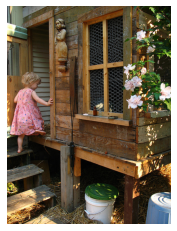

In [ ]:
dict_items = descriptions.items()

first_two = list(dict_items)[:2]
#print(type(first_two))
for x in first_two:
    for i in x[1]:
        print(x[0],i)
    print()

image_path="/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_Dataset/Flicker8k_Dataset/"

import cv2
import matplotlib.pyplot as plt

image1=cv2.imread(image_path+"1000268201_693b08cb0e.jpg")
image2=cv2.imread(image_path+"1001773457_577c3a7d70.jpg")

# image1=cv2.imread(image_path+"2258277193_586949ec62.jpg")
# 1001773457_577c3a7d70 this img isn't present in our dataset
# So we have to remove the description of this image id

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image1)

#image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
#plt.imshow(image2)
#plt.axis("off")

### Module 5: Save the descriptions into file 'descriptions.txt'

In [ ]:
# save descriptions to file in text format
def save_descriptions(descriptions, filename):
	#lines = list()
	#for key, desc_list in descriptions.items():
	#		for desc in desc_list:
	#		lines.append(key + ' ' + desc)
	#data = '\n'.join(lines)
	data = str(descriptions)
	file = open(filename, 'w')
	file.write(data)
	file.close()

# save descriptions
save_descriptions(descriptions, '/content/drive/MyDrive/Colab Final yr project/descriptions.txt')

#### Vocab
- Checking Total no of words across all the descriptions.
- One method : To take all unique words across all descriptions.
- One method : To take only frequent words(comes more than n times) across all descriptions (n=thresold).

In [ ]:
#Generate total no of words across all descriptions
total_words=[]
for key in descriptions.keys():
    [total_words.append(i) for desc in descriptions[key] for i in desc.split()]

print("Total no of words = %d" %len(total_words))

#Generate total unique words across all descriptions
total_unique_words = set()
for key in descriptions.keys():
    [total_unique_words.update(sentence.split()) for sentence in descriptions[key]]

print("Total no of unique words = %d" %len(total_unique_words))

#Generate only frequent(upto a thresold) words across all descriptions
import collections
counter = collections.Counter(total_words)
freq_count=dict(counter)  # dict word:freq
#print(len(freq_count.keys()))

#sort this freq_count according to freq_count
sorted_freq_count = sorted(freq_count.items(),reverse=True,key=lambda x:x[1])

#filter : only words comes more than or equal to thresold=10
thresold=10
sorted_freq_count = [x for x in sorted_freq_count if x[1]>thresold]
total_freq_words = [x[0] for x in sorted_freq_count]

print("Total no of frequent words = %d" %len(total_freq_words))

Total no of words = 373837
Total no of unique words = 8424
Total no of frequent words = 1845


### Module 6: Convert the loaded descriptions into a vocabulary of words

In [ ]:
# convert the loaded descriptions into a vocabulary of words
def to_vocab(descriptions):
	# store all unique words sorted desc order of their frequency
	counter = collections.Counter(total_words)
	freq_count=dict(counter)  # dict word:freq
	#print(len(freq_count.keys()))

	# sort this freq_count according to freq_count
	sorted_freq_count = sorted(freq_count.items(),reverse=True,key=lambda x:x[1])

	# filter : only words comes more than or equal to thresold=10
	thresold=10
	sorted_freq_count = [x for x in sorted_freq_count if x[1]>thresold]
	total_freq_words = [x[0] for x in sorted_freq_count]
	return total_freq_words
 
# create vocabulary
vocabulary = to_vocab(descriptions)
print('Vocabulary created of Size: %d' % len(vocabulary))


Vocabulary created of Size: 1845


In [ ]:
#count all images in image dataset
def image_count(directory):
    count=0
    for name in listdir(directory):
        count+=1
    return count

directory = '/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_Dataset/Flicker8k_Dataset'
image_count = image_count(directory)
print("No of images in Dataset is ",image_count)

No of images in Dataset is  8091


- 2258277193_586949ec62 image is not present in images so we have only 8091 images while 8092 descriptions
- So we have to remove the description with this image_id
- Since we don't have this image_id in our train test and dev set so no need to dicard it 

Prepare Train/Test Data

In [ ]:
# Read text file
train_file = "/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_text/Flickr_8k.trainImages.txt"
test_file = "/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_text/Flickr_8k.testImages.txt"

train_file_data = load_doc(train_file)
test_file_data = load_doc(test_file)

# text to list
train = txtToList(train_file_data)
test = txtToList(test_file_data)
# remove filename .jpg from image id
train = [row.split(".")[0] for row in train]
test = [row.split(".")[0] for row in test]
print(train)
print(test)

['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87', '218342358_1755a9cce1', '2501968935_02f2cd8079', '2699342860_5288e203ea', '2638369467_8fc251595b', '2926786902_815a99a154', '2851304910_b5721199bc', '3423802527_94bd2b23b0', '3356369156_074750c6cc', '2294598473_40637b5c04', '1191338263_a4fa073154', '2380765956_6313d8cae3', '3197891333_b1b0fd1702', '3119887967_271a097464', '2276499757_b44dc6f8ce', '2506892928_7e79bec613', '2187222896_c206d63396', '2826769554_85c90864c9', '3097196395_ec06075389', '3603116579_4a28a932e2', '3339263085_6db9fd0981', '2532262109_87429a2cae', '2076906555_c20dc082db', '2502007071_82a8c639cf', '3113769557_9edbb8275c', '3325974730_3ee192e4ff', '1655781989_b15ab4cbff', '1662261486_db967930de', '2410562803_56ec09f41c', '2469498117_b4543e1460', '69710415_5c2bfb1058', '3414734842_beb543f400', '3006217970_90b42e6b27', '2192411521_9c7e488c5e', '3535879138_9281dc83d5', '2685788323_ceab14534a', '34

Prepare Descriptions for the Training Data
- Tweak : Add start and end token to our train descriptions

In [ ]:
# start token "startseq" and end token "endseq"
train_descriptions={}

for image_id in train:
    train_descriptions[image_id]=[]
    for caption in descriptions[image_id]:
        #caption with start and end token
        caption_to_append = "startseq "+ caption +" endseq"
        train_descriptions[image_id].append(caption_to_append)

train_descriptions['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

### Transfer Learning
- Images --> Features
- Text -->Features

### Feature Extraction

In [ ]:
from pickle import dump
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from keras.models import Model, load_model
import numpy as np
from time import time
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

### Model : Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
model=ResNet50(weights="imagenet",input_shape=(224,224,3)) 
model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

### Module 7 : Image preprocessing
Convert Image suitable for our model
- reshape is necessary bcoz we fed a batch of inputs in model
- so the new shape must be a tensor (batch_size,img[0],img[1],img[2])
- image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
- so by default batch size = 1 so the reshaped tensor is (1,224,224,3)

In [ ]:
def preprocess_image(image):
    # load an image with target size 224,224
    image = load_img(image, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model i.e expand numpy array of image pixels with batch_size
    image = np.expand_dims(image,axis=0)  
    # prepare the image for the ResNet50 model : Normalisation
    image = preprocess_input(image)
    return image

### Module 8 : Feature Extraction

In [ ]:
# extract features from each photo in the directory
def extract_features(directory,model):
    # extract features from each photo and store in dict
    features = dict()
    # re-structure the model by removing last two layers
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    for image_id in listdir(directory):
        filename = directory + '/' + image_id
        # Preprocess image
        image=preprocess_image(filename)
        # get features
        feature_vector = model.predict(image)   #(image,verbose=0)
        feature_vector = feature_vector.reshape((-1,))
        img_id = image_id.split()[0]
        features[img_id] = feature_vector
        print('>%s' % img_id)
    return features




In [ ]:
directory = '/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_Dataset/Flicker8k_Dataset'

# load the model
model = ResNet50()

features = extract_features(directory,model)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('/content/drive/MyDrive/Colab Final yr project/features_ResNet50.pkl','wb'))

Split Train feature vector and Test feature vector Dev feature vector

---



In [ ]:
features_train = {}
features_test = {}
# features_dev = {}
# 2258277193_586949ec62
for image in train:
    img = image + ".jpg"
    features_train[image] = features[img]

for image in test:
    img = image+".jpg"
    features_test[image] = features[img]

# save as pickel file into the disk for future use
dump(features_train, open('/content/drive/MyDrive/Colab Final yr project/features_train_ResNet50.pkl','wb'))
dump(features_test, open('/content/drive/MyDrive/Colab Final yr project/features_test_ResNet50.pkl','wb'))

In [ ]:
#print(features_train)
for key,l in features_train.items():
    print(key,l)
    break
print(len(features_train))
#print(features_test)
print(len(features_test))

2513260012_03d33305cf [0.34707907 0.51159126 0.08728828 ... 1.1897281  0.04043855 0.15271126]
6000
1000


### Text Preprocessing

In [ ]:
len(vocabulary)
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(vocabulary):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word

# two special words to be added i.e startseq and endseq
idx_to_word[1846]='startseq'
word_to_idx['startseq']=1846
idx_to_word[1847]='endseq'
word_to_idx['endseq']=1847
vocab_size = len(word_to_idx)+1
print("vocab size = ",vocab_size)

#max length description
max_len=0
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len=max(max_len,len(cap.split()))

print("max length description ",max_len)

vocab size =  1848
max length description  35


In [ ]:
print(train_descriptions)

{'2513260012_03d33305cf': ['startseq black dog is running after white dog in the snow endseq', 'startseq black dog chasing brown dog through snow endseq', 'startseq two dogs chase each other across the snowy ground endseq', 'startseq two dogs play together in the snow endseq', 'startseq two dogs running through low lying body of water endseq'], '2903617548_d3e38d7f88': ['startseq little baby plays croquet endseq', 'startseq little girl plays croquet next to truck endseq', 'startseq the child is playing croquette by the truck endseq', 'startseq the kid is in front of car with put and ball endseq', 'startseq the little boy is playing with croquet hammer and ball beside the car endseq'], '3338291921_fe7ae0c8f8': ['startseq brown dog in the snow has something hot pink in its mouth endseq', 'startseq brown dog in the snow holding pink hat endseq', 'startseq brown dog is holding pink shirt in the snow endseq', 'startseq dog is carrying something pink in its mouth while walking through the sn

### Module 9 : Data Loader(Generator)
It is required to feed data in batches to the model 

In [ ]:
# features is mapping of image_id and feature vector 
def data_generator(train_descriptions,features,word_to_idx,max_len,batch_size):
    # two inputs x1 image feature vector x2 seq of desc
    # y is the actual output seq[i] for seq[0,i-1]
    x1,x2,y = [],[],[]
    n = 0
    while True:
        for key,desc_list in train_descriptions.items():
            n+=1       # here we taken batch size = no of desc to be processed at atime
            photo = features[key]
            for desc in desc_list:    
                # converting seq of words list of numbers 
                # add a word in seq only if it is present in our vocab (word_to_idx)
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range (1,len(seq)):
                    # input will be seq 0 to i-1 and pred should be seq[i] 
                    xi = seq[0:i]
                    yi = seq[i]
                    # every xi should have same len so we will add 0's in end of xi
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    # here value=0 denotes empty(padding) word that's what we have reserved 0
                    # in word_to_idx and idx_to_word dict
                    # we return 0th element of xi bcoz pad_seq accepts & returns 2d mat
                    yi = to_categorical([yi],num_classes=vocab_size)[0]
                    # yi will be list of categorical o/p of size = vocab_size (also 2d mat)
                    # where idx of next word in seq will be 1 and rest will be 0 
                    x1.append(photo)   # 2048 dimensional (feature_vector_size 2048*batch_size)
                    x2.append(xi)      # 35 dimensional   (max_len 35*batch_size)
                    y.append(yi)       # 1848 dimensional (vocab_size 1848*batch_size)   
            if n==batch_size:
                # it generates batch of both inputs img and seq and actual o/p(next word)            actual means groundTruth
                yield [[np.array(x1),np.array(x2)],np.array(y)]
                x1,x2,y = [],[],[]
                n=0
                # yield is used instead of return 
                # becoz generators remembers the state where the functions was in previous call






### Transfer learning for text description 

### Modeule 10 : Word Embeddings
- Load Glove vector 
- convert in map of word : glove vector of word
- Form embedding matrix of glove vectors for words in our vocab


In [ ]:
f = open('/content/drive/MyDrive/Colab Final yr project/glove.6B.50d.txt',encoding='utf8')
# here in file f each line will be like ['the', '0.418', '0.24968', '-0.41242',........]
# first one is the word and remaining are 50 dimension values 
embedding_index = {}

for line in f:
    values=line.split()
    word = values[0]
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word]=word_embedding

embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [ ]:
def get_embedding_matrix():
    emb_dim = 50   # glove vector dim = 50

    # for word not present in glove vector fill all  values with 0 
    emb_matrix = np.zeros((vocab_size,emb_dim))
    for word,index in word_to_idx.items():
        emb_vector = embedding_index.get(word)
        # if word present in glove vector embedding matrix will be glove vector of word 
        if emb_vector is not None:
            emb_matrix[index] = emb_vector
    return emb_matrix

# Embedding matrix of glove vector for each word in our vocab
embedding_matrix = get_embedding_matrix()
# print shape of embedding_matrix
print("embedding matrix created of shape : ",embedding_matrix.shape)

embedding matrix created of shape :  (1848, 50)


### Model Architecture 

In [ ]:
# image as input
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [ ]:
# captions as input
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)


In [ ]:
# Decoder Feed Fwd model
decoder1 = add([inp_img2,inp_cap3])   #conactenate
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)
# summary of model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 50)       92400       ['input_4[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_3[0][0]']                
                                                                                            

In [ ]:
# Embedding layer
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

### Training of Model

In [ ]:
epochs = 20
batch_size = 3
number_pics_per_batch = batch_size
steps = len(train_descriptions)//number_pics_per_batch

In [ ]:
def train():
    for i in range(epochs):
        generator = data_generator(train_descriptions,features_train,word_to_idx,max_len,batch_size)
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        #model.save('/content/drive/MyDrive/Colab Final yr project/model_weights/model_'+str(i)+'.h5')
        model.save('/content/sample_data/model_weights/model_'+str(i)+'.h5')

In [ ]:
train()

   3/2000 [..............................] - ETA: 56s - loss: 2.6892 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


2000/2000 [==============================] - 51s 26ms/step - loss: 2.5123


In [ ]:
#model = load_model('/content/sample_data/model_weights/model_9.h5')
model = load_model('/content/drive/MyDrive/Colab Final yr project/model_weights/model_9.h5')

### Predictions

In [ ]:
def predict_captions(photo):
    in_text="startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')

        y_pred = model.predict([photo,sequence])
        y_pred = y_pred.argmax() #word with max prob always - Greedy sampling
        word = idx_to_word[y_pred]
        in_text += (' ' + word)
        if word == "endseq":
            break

    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)

    return final_caption


In [ ]:
# pick some random images from test and see result

for i in range(15):
    idx = np.random.randint(0,1000)
    all_img_names = list(features_test.keys())
    img_name = all_img_names[idx]
    photo_2048 = features_test[img_name].reshape((1,2048))
    #print(img_name)
    img=plt.imread("/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_Dataset/Flicker8k_Dataset/"+img_name+".jpg")
    caption = predict_captions(photo_2048)
    print(caption)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

NameError: ignored

Test For Random Google Images

In [ ]:
directory1 = '/content/drive/MyDrive/Colab Final yr project/random google images'
# load the model
model = ResNet50()

features1 = extract_features(directory1,model)
print('Extracted Features: %d' % len(features1))

all_img_names1 = list(features1.keys())
print(all_img_names1)

>5454.jpg
>6546546fdd4545ab.jpg
>IMG20180121193658.jpg
>213145513d5f5.jpg
>IMG20180202200400_1.jpg
Extracted Features: 5
['5454.jpg', '6546546fdd4545ab.jpg', 'IMG20180121193658.jpg', '213145513d5f5.jpg', 'IMG20180202200400_1.jpg']


In [ ]:
img_name = all_img_names[4]
photo_2048 = features1[img_name].reshape((1,2048))
print(img_name)
img=plt.imread("/content/drive/MyDrive/Colab Final yr project/random google images/"+img_name)
caption = predict_captions(photo_2048)
print(caption)
plt.imshow(img)
plt.axis('off')
plt.show()

IMG20180202200400_1.jpg


ValueError: ignored

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
model = VGG19()
# re-structure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

574726144/574710816 [==============================] - 3s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

### Model : VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
model = VGG16()
# re-structure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553476096/553467096 [==============================] - 4s 0us/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [ ]:
# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

# extract features from all images
directory = '/content/drive/MyDrive/Colab Final yr project/Dataset/Flickr8k_Dataset/Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('/content/drive/MyDrive/Colab Final yr project/features_vgg16.pkl', 'wb'))